In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
market_df = pd.read_csv("final_shop_6modata.csv")
market_df.head()

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604


In [3]:
def find_outliers(data: pd.DataFrame, 
                  column_name: str
                  )-> pd.DataFrame:
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1

    low_iqr = data[column_name] < q1 - 1.5*iqr
    high_iqr = data[column_name] > q3 + 1.5*iqr

    outliers = data[low_iqr | high_iqr]

    return outliers

In [35]:
def get_barplots(data: pd.DataFrame, feature: str):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

    weights = ["Ad Types", "Devices"]
    for i, weight in enumerate(weights):
        sns.barplot(data=data,
                    y=feature,
                    hue=weight,
                    ax=axes[i])
        axes[i].bar_label = axes[i].containers[0]
    
    plt.show()

<AxesSubplot:ylabel='Clicks'>

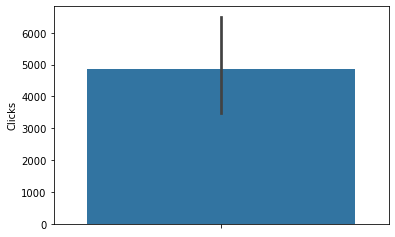

In [39]:
sns.barplot(data=market_df, y="Clicks", hue="")

In [5]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


In [6]:
market_df.isnull().any().sum()

0

In [7]:
market_df.duplicated(keep=False).sum()

0

In [8]:
market_df.head(2)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951


In [9]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


##### **Manipulating Ad Group**
<p>The ad group contain multiple words that could be separated into sevaral columns to deepend our analysis</p>

In [10]:
market_df[["Shop", "Ad Types", "Devices", "Campaigns"]] = market_df["Ad Group"].str.split(" - ", n=3, expand=True)
market_df.head(2)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Shop,Ad Types,Devices,Campaigns
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086,Shop,1:1,Desk,[shop coupon code]
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951,Shop,1:1,Desk,[shop coupon]


In [11]:
market_df.drop(["Shop"], axis=1, inplace=True)

In [12]:
cleaned_name = {}
for campaign in market_df["Campaigns"].unique():
    if "[" in campaign:
        cleaned_name[campaign] = campaign.strip("[]")
    else:
        cleaned_name[campaign] = campaign

In [13]:
cleaned_name

{'[shop coupon code]': 'shop coupon code',
 '[shop coupon]': 'shop coupon',
 '[shop discount code]': 'shop discount code',
 '[shop promo code]': 'shop promo code',
 '[shop promo]': 'shop promo',
 'Competitor': 'Competitor',
 'Coupon Code': 'Coupon Code',
 'Discount Code': 'Discount Code',
 'Free Shipping': 'Free Shipping',
 'Offer': 'Offer',
 'Promo Code': 'Promo Code',
 'Sale': 'Sale',
 'Black Friday/Cyber Monday': 'Black Friday/Cyber Monday'}

In [14]:
market_df["Campaigns"].replace(cleaned_name, inplace=True)

In [15]:
market_df.head()

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086,1:1,Desk,shop coupon code
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951,1:1,Desk,shop coupon
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136,1:1,Desk,shop discount code
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921,1:1,Desk,shop promo code
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604,1:1,Desk,shop promo


In [16]:
# Change device data for better clarity
initial_name = market_df["Devices"].unique()
new_name = ["Desktop", "Mobile"]
change_name = dict(zip(initial_name, new_name))

market_df["Devices"].replace(change_name, inplace=True)

In [17]:
market_df["Devices"].unique()

array(['Desktop', 'Mobile'], dtype=object)

<AxesSubplot:xlabel='Devices', ylabel='count'>

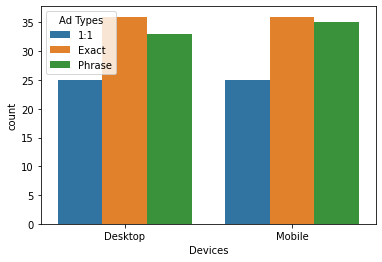

In [18]:
sns.countplot(x="Devices", hue="Ad Types", data=market_df)

##### **Checking the Month**

In [19]:
market_df["Month"].unique()

array(['July', 'August', 'September', 'October', 'November'], dtype=object)

##### **Checking Impression Data**

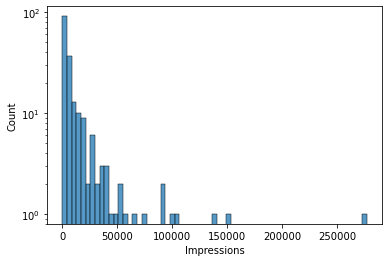

In [20]:
sns.histplot(market_df["Impressions"])
plt.yscale("log")

<AxesSubplot:xlabel='Impressions', ylabel='Devices'>

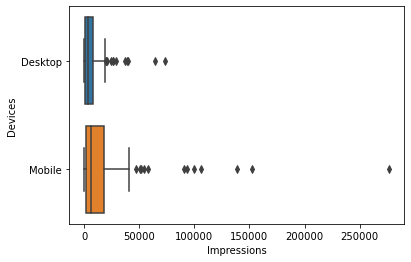

In [21]:
sns.boxplot(x=market_df["Impressions"], y=market_df["Devices"])

In [22]:
market_df.head(2)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086,1:1,Desktop,shop coupon code
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951,1:1,Desktop,shop coupon


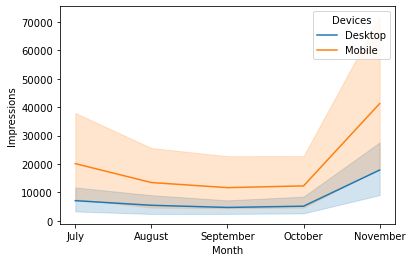

In [23]:
sns.lineplot(x="Month", y="Impressions", hue="Devices",data=market_df)
plt.show()

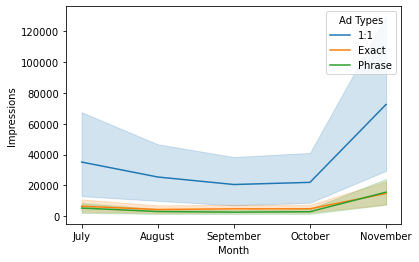

In [24]:
sns.lineplot(x="Month", y="Impressions", hue="Ad Types", data=market_df)
plt.show()

In [25]:
market_df.head(2)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086,1:1,Desktop,shop coupon code
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951,1:1,Desktop,shop coupon


In [26]:
impress_outliers = find_outliers(market_df, "Impressions")
len(impress_outliers)/market_df.shape[0]

0.11052631578947368

In [27]:
market_df.describe()["Impressions"]

count       190.000000
mean      14077.363158
std       29771.686227
min          35.000000
25%        1065.000000
50%        4969.000000
75%       13380.000000
max      276568.000000
Name: Impressions, dtype: float64

In [28]:
market_df[market_df["Impressions"] > 276500]

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
151,Shop - 1:1 - Mob - [shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.1,-5605.297,1:1,Mobile,shop coupon


##### Key Takeaways from Impressions
<p>Overall Impression average is 14077, which means the ads are shown to user 14077.363 at average from July to November</p>
<p>From July to August, the impressin is dropped but and tend to decline until October, but on october the impressions are soaring</p>